In [1]:
from google.colab.patches import cv2_imshow
from google.colab import drive
import numpy as np
import cv2
from matplotlib import pyplot as plt
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256, 3)


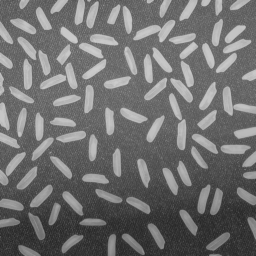

In [2]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/rice.bmp')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap = 'gray')
cv2_imshow(gimg1)

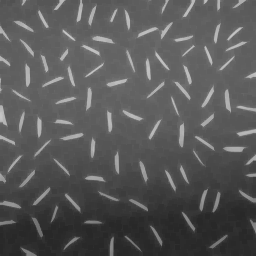

In [3]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gimg1,kernel,iterations = 1)
cv2_imshow(erosion)

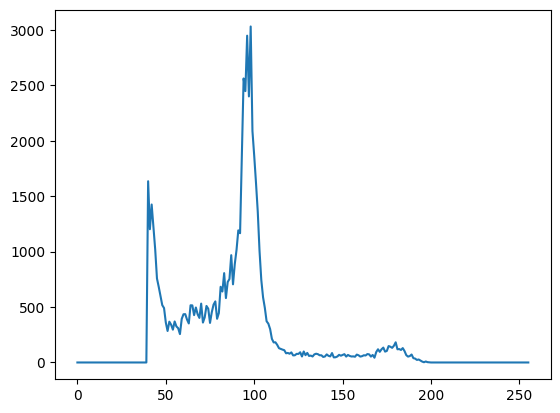

In [4]:
hist = cv2.calcHist([erosion],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

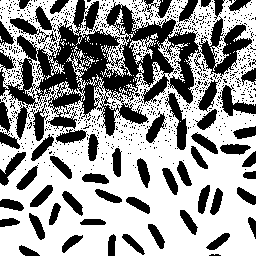

In [9]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.uint8)

threshold = 110

for i in range(gimg1.shape[0]):
  for j in range(gimg1.shape[1]):
    if gimg1[i,j] < threshold:
      gBin[i,j] = 255

cv2_imshow(gBin)

In [10]:
num_labels, labels = cv2.connectedComponents(gBin, connectivity=8)
print(num_labels)

84


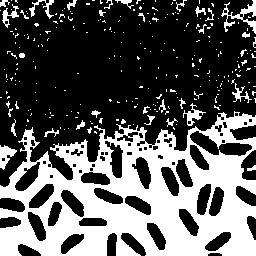

In [11]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(gBin,kernel,iterations = 1)
cv2_imshow(erosion)

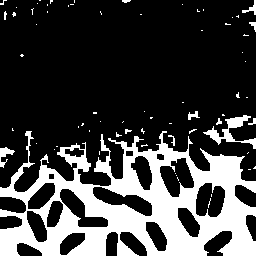

In [13]:
kernel = np.ones((3,3),np.uint8)
dilate = cv2.erode(erosion,kernel,iterations = 1)
cv2_imshow(dilate)

In [14]:
num_labels, labels = cv2.connectedComponents(dilate, connectivity=8)
print(num_labels)

69


(480, 1622, 3)


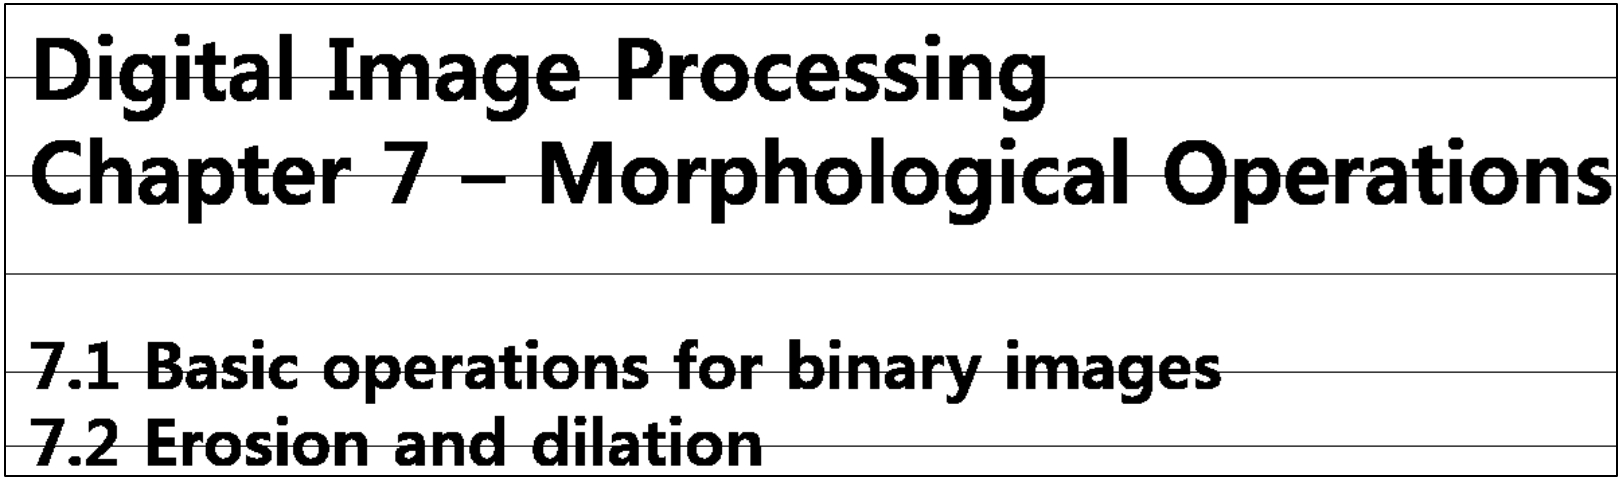

In [16]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/Images/scanimg.jpg')
print(img.shape)
gimg1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gimg1, cmap = 'gray')
cv2_imshow(gimg1)

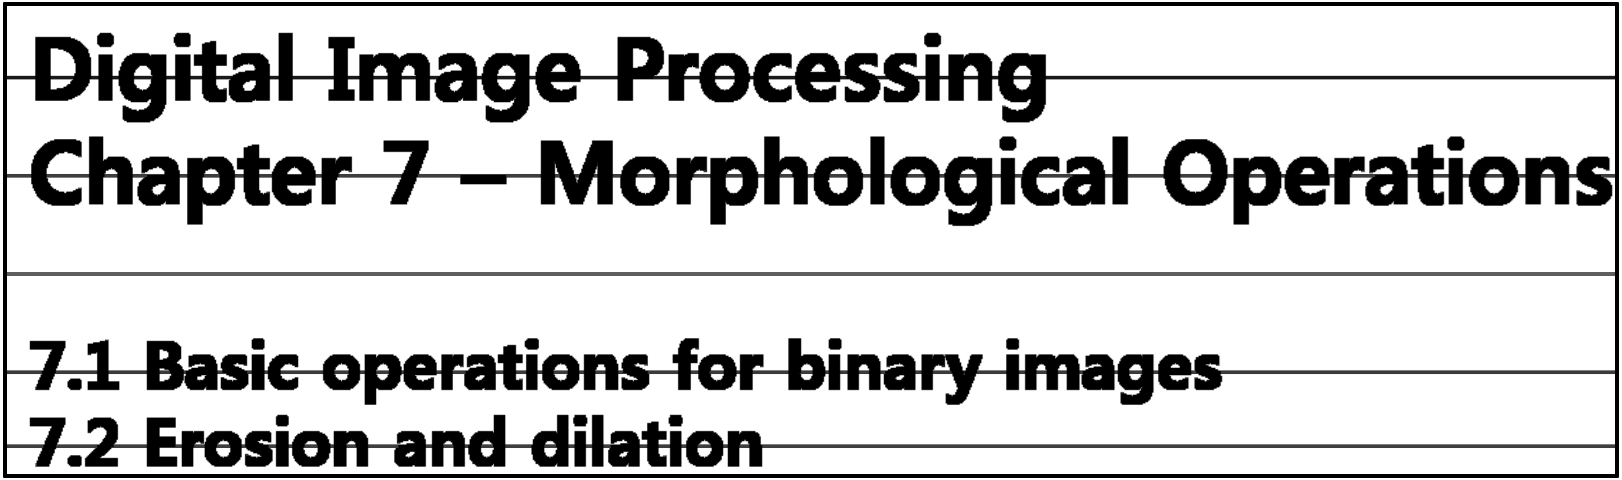

In [18]:
kernel = np.ones((3,3),np.uint8)
dilate = cv2.erode(gimg1,kernel,iterations = 1)
cv2_imshow(dilate)

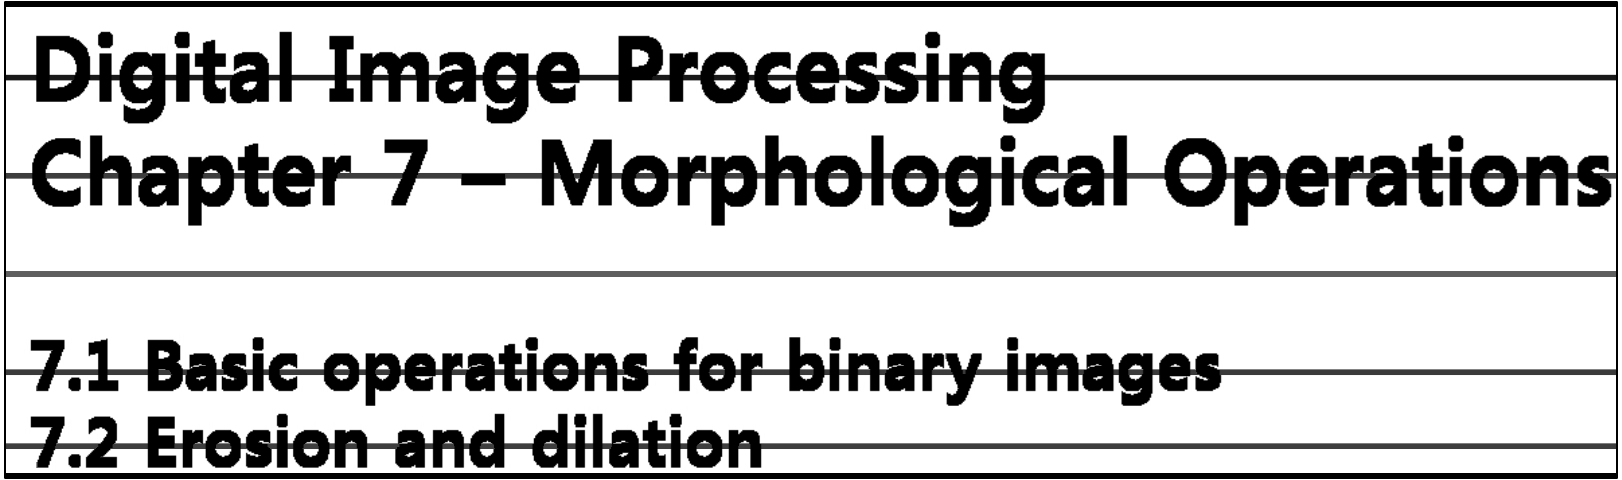

In [27]:
kernel = np.ones((3,1),np.uint8)
erosion = cv2.erode(gimg1,kernel,iterations = 2)
cv2_imshow(erosion)

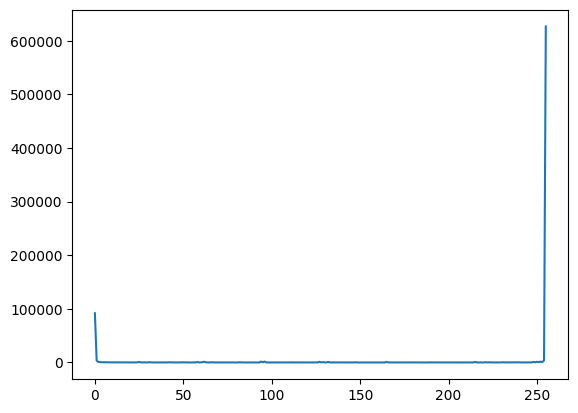

In [28]:
hist = cv2.calcHist([gimg1],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

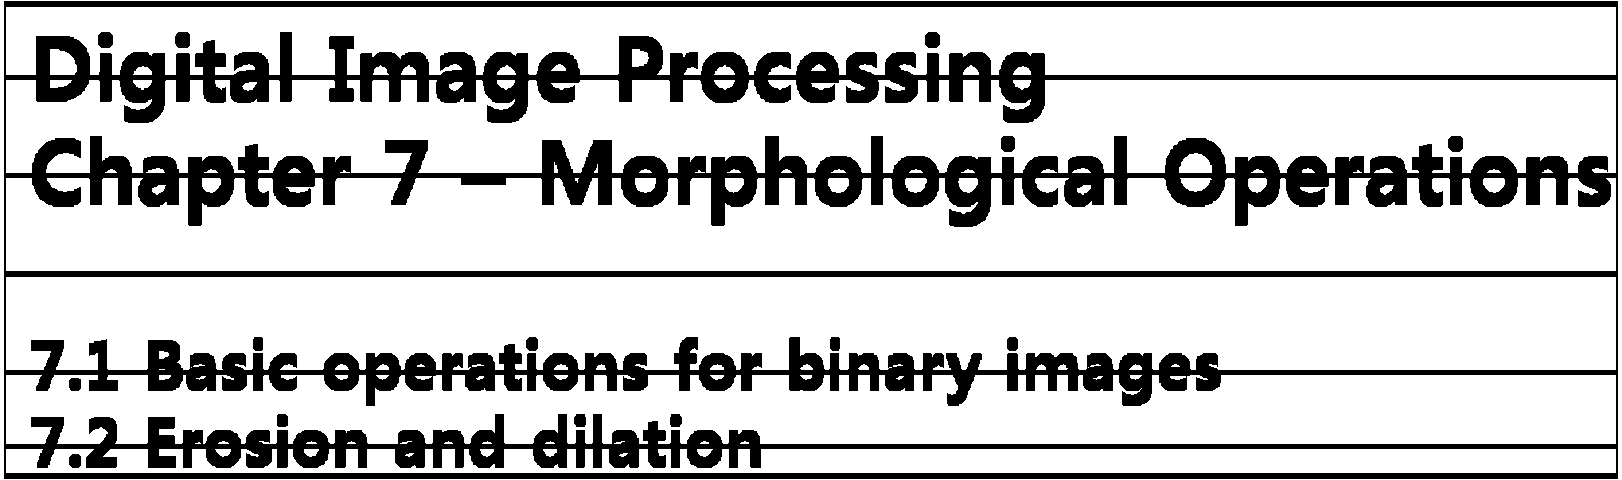

In [30]:
gBin = np.zeros((gimg1.shape[0], gimg1.shape[1]), dtype=np.uint8)

threshold = 120

for i in range(gimg1.shape[0]):
  for j in  range(gimg1.shape[1]):
    if erosion[i,j] > threshold:
      gBin[i,j] = 255

cv2_imshow(gBin)

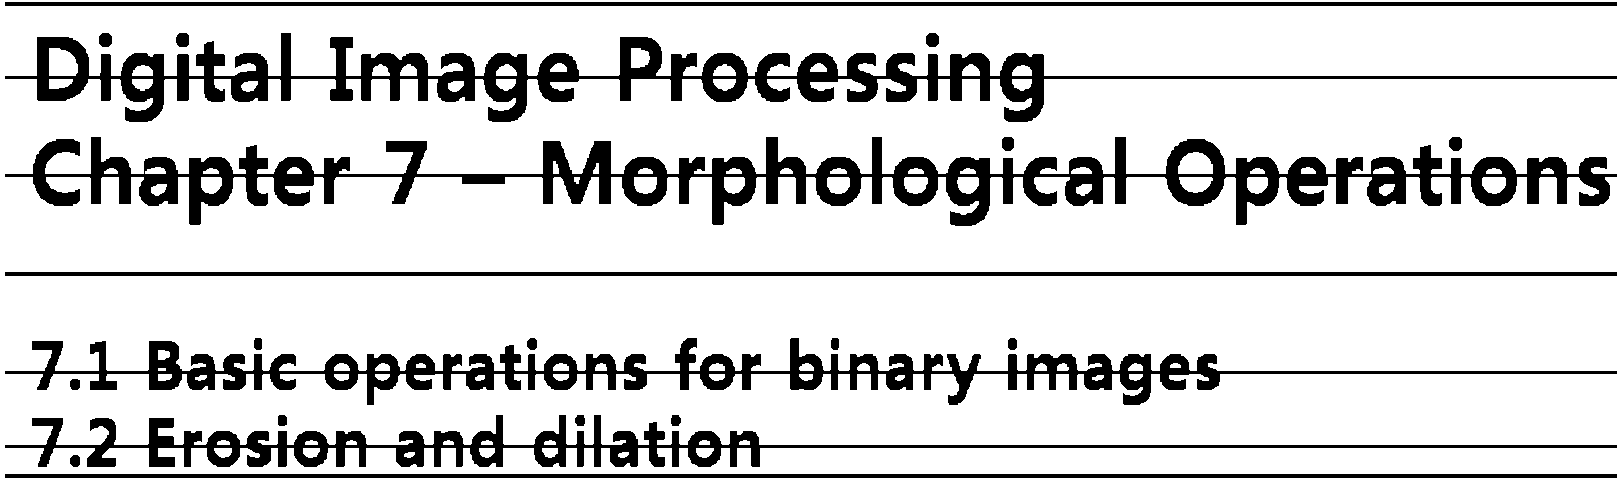

In [32]:
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(gBin,kernel,iterations = 1)
cv2_imshow(dilate)

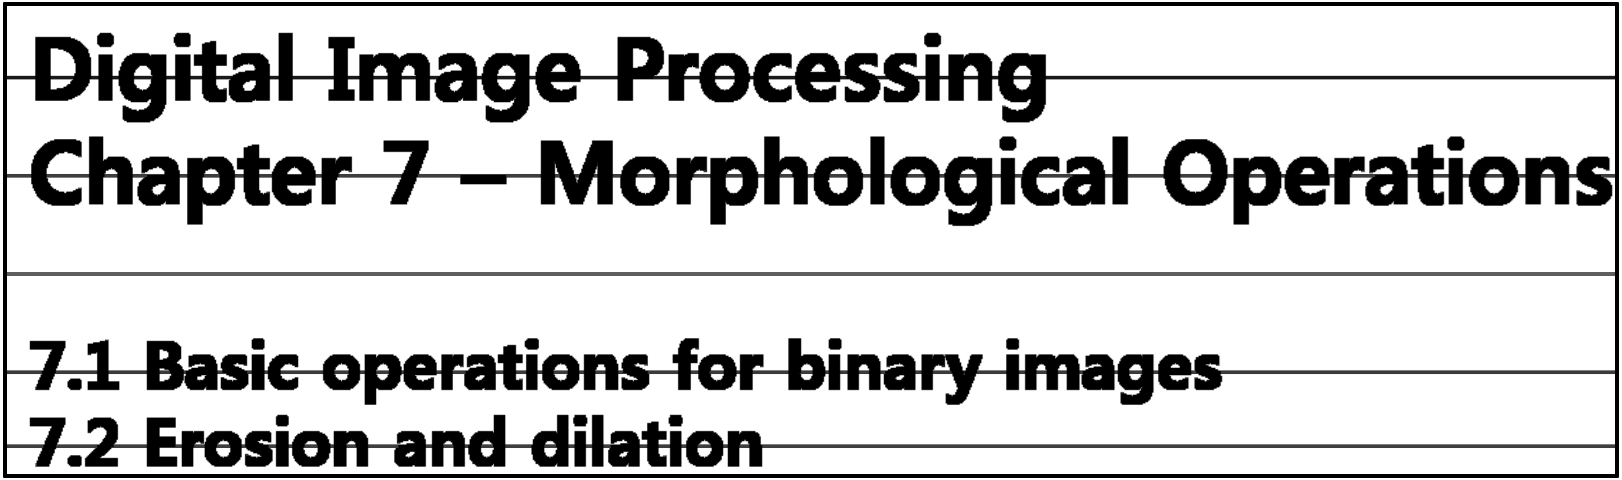

In [33]:
kernel = np.ones((3,3),np.uint8)
dilate = cv2.erode(gimg1,kernel,iterations = 1)
cv2_imshow(dilate)